## Chapter 7 of Pasha

git add -> commit -> push

Jeremy
1. mkdir Jeremy
2. cd jeremy
3. mkdir aspy07
4. cd aspy 07
5. run jupyter-lab under the shell Jeremy/aspy07
6. saved c07.ipynb in jupyter-kab
7. git add
8. git commit
9. git push 

### Section 7.2: Numerical Integration

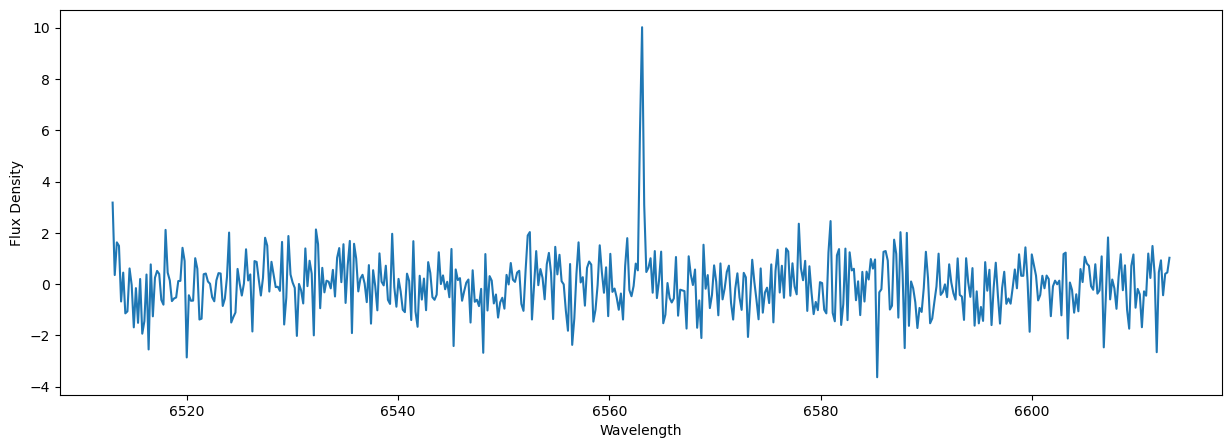

In [1]:
import numpy as np
import matplotlib.pyplot as plt

wl = np.linspace(6500, 6600, 500)+13
flux = np.zeros_like(wl)
flux[250]=10
flux[249]=4.95; flux[251]=5.01
flux[248]=1.2; flux[252]=1.1
flux[247]=0.11; flux[253]=0.10
noise=np.random.normal(0, 1, size=flux.size)
flux+=noise

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(wl, flux)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density');

(6550.0, 6570.0)

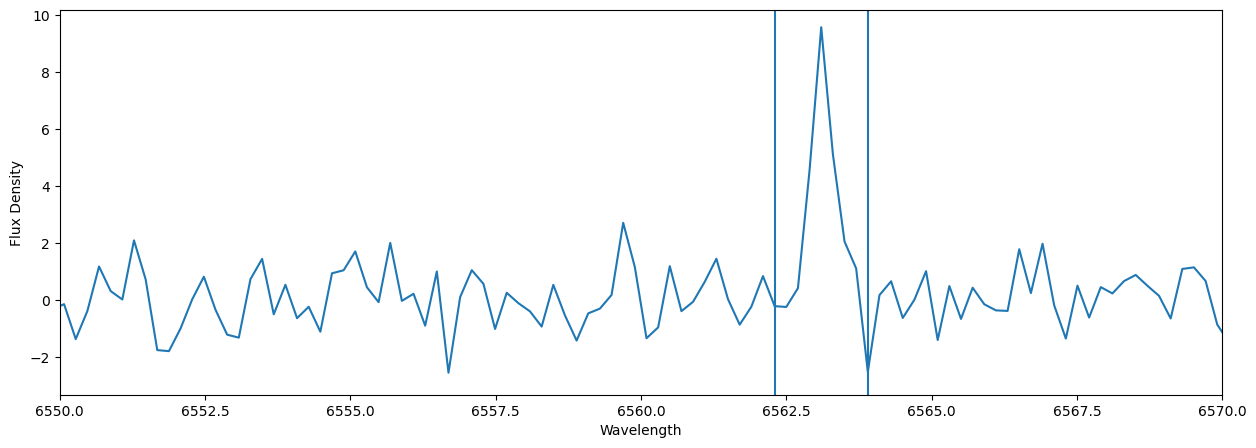

In [2]:
import numpy as np
import matplotlib.pyplot as plt

wl = np.linspace(6500, 6600, 500)+13
flux = np.zeros_like(wl)

flux[250] = 10
flux[249] = 4.95
flux[251] = 5.01
flux[248] = 1.2
flux[252] = 1.1
flux[247] = 0.11
flux[253] = 0.10

noise=np.random.normal(0, 1, size=flux.size)
flux += noise

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wl, flux)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density');

ax.axvline(wl[246])
ax.axvline(wl[254])
ax.set_xlim(6550, 6570)

In [3]:
from scipy.integrate import trapezoid, simpson

sub_wl = wl[246:254]
sub_fl = flux[246:254]

integral_trapz = trapezoid(sub_fl, sub_wl)
integral_simps = simpson(sub_fl, sub_wl)

print(f'Trapezoid Rule: {integral_trapz:.4f}')
print(f'Simpsons Rule: {integral_simps:.4f}')

#Why do the values not match the textbook?

Trapezoid Rule: 4.4018
Simpsons Rule: 4.2688


In [4]:
def gauss(x, amp, loc, sigma):
    return amp * np.exp(-((x - loc)**2) / (2 * sigma**2))

(6550.0, 6570.0)

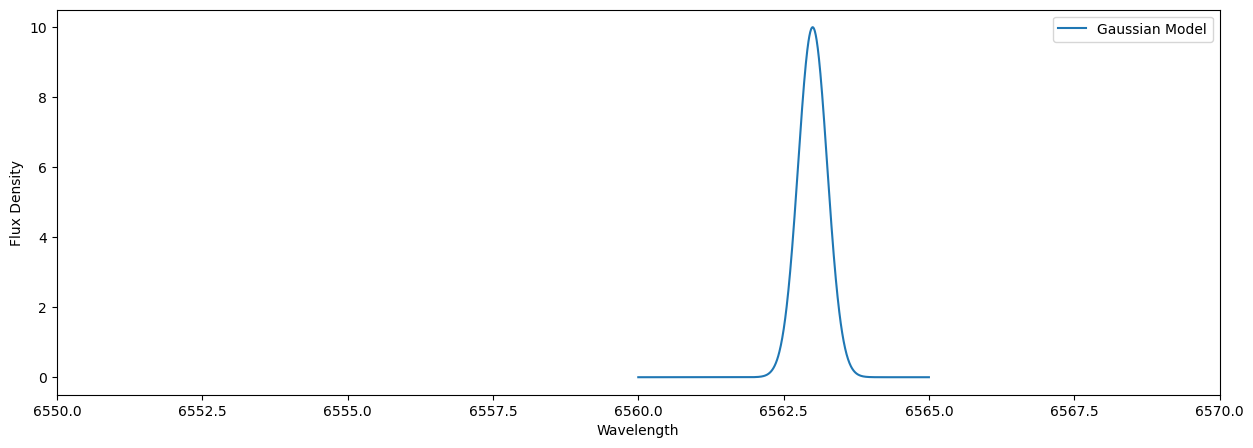

In [12]:
xx = np.linspace(6560, 6565, 1000)
gauss_test = gauss(xx, 10, 6563, 0.25)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xx, gauss_test, label='Gaussian Model')
ax.legend(loc='upper right')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')
ax.set_xlim(6550, 6570)

#different from the book

In [13]:
from scipy.integrate import quad

res = quad(func=gauss, a=6560, b=6565, args=(10, 6563, 0.25))
print(f'Numerical Integral with Quad: {res[0]:.4f}')

Numerical Integral with Quad: 6.2666


In [14]:
true_integral = 10 * np.sqrt(2 * np.pi * 0.25**2)
true_integral

np.float64(6.2665706865775)

### Section 7.3: Optimization

Optimization: finding a set of parameters that maximizes the value of a function.

In [16]:
#curve_fit: non-linear least squares
from scipy.optimize import curve_fit

res = curve_fit(f=gauss, xdata=wl, ydata=flux, p0=[10, 6563, 0.25])
res

(array([9.29727782e+00, 6.56311725e+03, 1.85452224e-01]),
 array([[ 8.74658033e-01,  1.28407802e-04, -1.13066514e-02],
        [ 1.28407802e-04,  4.75021544e-04, -4.42465269e-06],
        [-1.13066514e-02, -4.42465269e-06,  4.53933405e-04]]))

(6550.0, 6570.0)

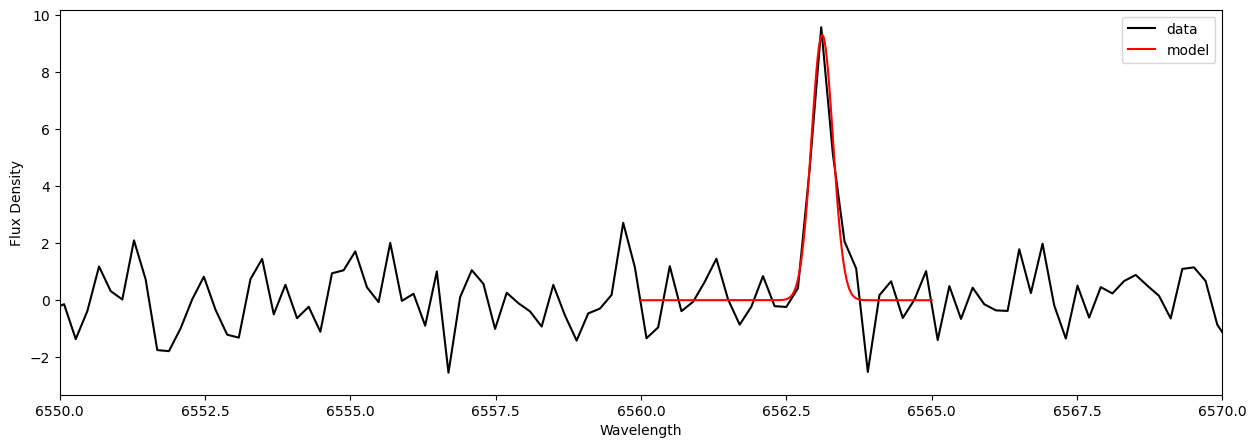

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wl, flux, label='data', color='k')

params = res[0]
ax.plot(xx, gauss(xx, *params), label='model', color='r')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')
ax.legend()
ax.set_xlim(6550,6570)

### 7.4: Statistics

- Statistical measues
- Statistical modeling

### 7.4.1： Distributions

In [20]:
from scipy.stats import multivariate_normal
import numpy as np

cov = np.array([[1, 0], [0, 1]])
norm = multivariate_normal(mean=[0, 0], cov=cov)

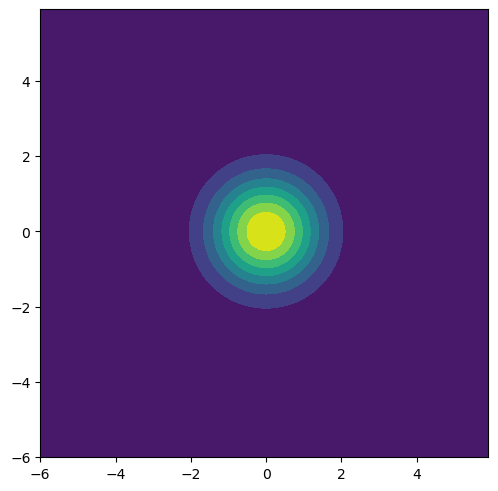

In [21]:
import matplotlib.pyplot as plt

x, y = np.mgrid[-6:6:0.1, -6:6:0.1]
pos = np.dstack((x,y))
fig, ax = plt.subplots(constrained_layout=True,)
ax.contourf(x, y, norm.pdf(pos)) #pdf: probability density function
ax.set_box_aspect(1)

In [22]:
norm.rvs()

array([ 1.18573432, -0.43351296])

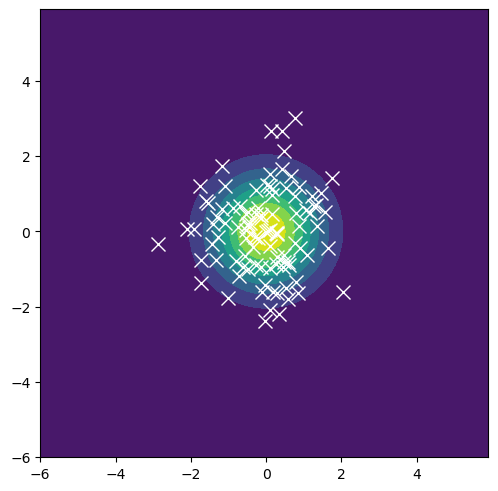

In [25]:
fig, ax = plt.subplots(constrained_layout=True)
samples = norm.rvs(size=100)
for i in samples:
    ax.plot(i[0], i[1], 'x', color='w', ms=10)

ax.contourf(x, y, norm.pdf(pos))
ax.set_box_aspect(1)

In [26]:
from scipy.stats import norm
norm_1d = norm(loc=0, scale=1) #frozen

print(f'Prob x<5: {norm.cdf(x=5)}') #Cumulative Distribution Function
print(f'Prob x<2: {norm.cdf(x=2)}')
print(f'Prob x<1: {norm.cdf(x=1)}')

Prob x<5: 0.9999997133484281
Prob x<2: 0.9772498680518208
Prob x<1: 0.8413447460685429
